In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import cluster, metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
current_dir = os.getcwd()
project_dir = os.path.abspath(os.path.join(current_dir, ".."))
DATA_PATH = f"{project_dir}/data/"

# télécharger les fichiers
customers_base = pd.read_csv(DATA_PATH+"processed/customers_base.csv")
data = customers_base[['review_score', 'recency', 'payment_value',
                       'payment_installments', 'payment_sequential', 'order_id',
                       'payment_type_num', 'customer_state_encoded', 'payment_type_encoded']]
data.dropna(inplace=True)


/Users/cyrielle/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
base_v0 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2016-2017.csv')
base_v1 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2018-01.csv')
base_v2 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2018-02.csv')
base_v3 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2018-03.csv')
base_v4 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2018-04.csv')
base_v5 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2018-05.csv')
base_v6 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2018-06.csv')
base_v7 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2018-07.csv')
base_v8 = pd.read_csv(f'{DATA_PATH}/processed/customers_base_2018-08.csv')

files_list = [base_v0, base_v1, base_v2, base_v3, base_v4, base_v5, base_v6, base_v7, base_v8]


In [8]:
import glob
files_list = glob.glob(f"{DATA_PATH}/processed/c*.csv")
files_list.sort()

In [24]:
files = {}
for i in range (9):
    files[f"base_v{i}"] = pd.read_csv(files_list[i])

In [10]:
def prep_and_fit_data(df):
    if "customer_unique_id" in df.columns:
        df.drop(columns=["customer_unique_id"], inplace=True)
    df.dropna(inplace=True)
    scaler = StandardScaler().fit(df)
    df_scaled = scaler.transform(df)
    cls = KMeans(n_clusters=7, n_init=1, init="random", random_state=42)
    cls.fit(df_scaled)
    return cls, scaler


In [37]:
ARI_score_base = []

for i in range(1, 9):
    base_i = files[f"base_v0"]
    base_i1 = files[f"base_v{i}"]

    kmean_i, scaler_i = prep_and_fit_data(base_i)
    kmean_i1, scaler_i1 = prep_and_fit_data(base_i1)

    base_i1_scaledi = scaler_i.transform(base_i1)
    base_i1_scaledi1 = scaler_i1.transform(base_i1)

    labels_i = kmean_i.predict(base_i1_scaledi)
    labels_i1 = kmean_i1.predict(base_i1_scaledi1)

    ARI_score_base.append(adjusted_rand_score(labels_i, labels_i1))


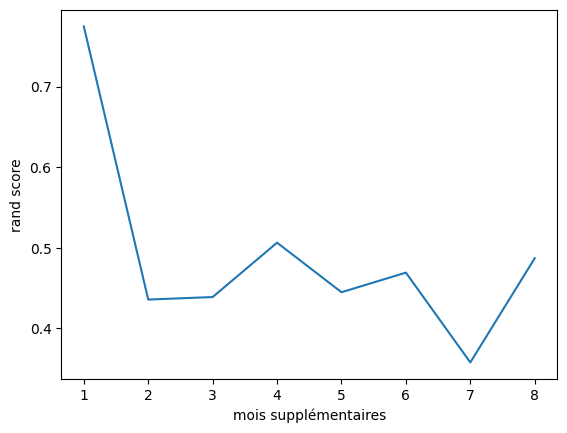

In [29]:
x = range(1, 9)
plt.plot(x, ARI_score_base)
plt.xlabel("mois supplémentaires")
plt.ylabel("rand score");